In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df=pd.read_excel(r"C:\Users\Stanislas Michel\OneDrive\Bureau\FGV - Time Series Analysis\Data\dados_BARBACENA.xlsx",sheet_name="dados",usecols="A:C",
parse_dates=["DATA"])

NameError: name 'pd' is not defined

In [13]:
df

,DATA,PRECIPITACAO,TEMPERATURA
0,2010-01-01,12.2,20.3
1,2010-01-02,1.4,21.9
2,2010-01-03,0.0,22.3
3,2010-01-04,0.0,22.2
4,2010-01-05,0.2,20.9
...,...,...,...
5475,2024-12-28,19.6,19.5
5476,2024-12-29,37.6,19.8
5477,2024-12-30,6.4,19.2
5478,2024-12-31,42.0,19.8


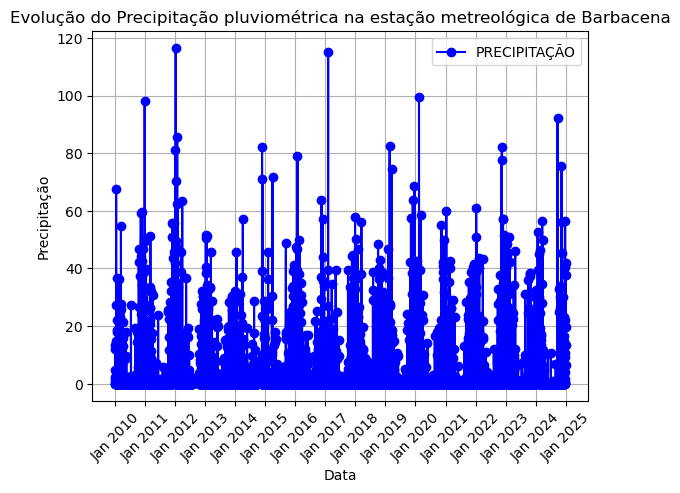

In [51]:
# Converter a coluna 'DATA' para datetime 
df["DATA"] = pd.to_datetime(df["DATA"], dayfirst=True) 
# Definir a coluna 'DATA' como índice (opcional, mas facilita) 
df.set_index("DATA", inplace=True) 
# Criar o gráfico plt.figure(figsize=(12, 6)) 
plt.plot(df.index, df["PRECIPITACAO"], marker="o", linestyle="-", color="b", label="PRECIPITAÇÃO") 
# Configurar rótulos e título 
plt.xlabel("Data") 
plt.ylabel("Precipitação") 
plt.title("Evolução do Precipitação pluviométrica na estação metreológica de Barbacena") 
plt.xticks(rotation=45) 
# Rotacionar datas para melhor visualização 
plt.legend() 
plt.grid() 

# Configurar rótulos do eixo X para mostrar apenas janeiro 
ax = plt.gca()   # Pega o eixo atual 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))  # Mostra só janeiro 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y")) # Formato "Jan 2022"

# Mostrar o gráfico 
plt.show()

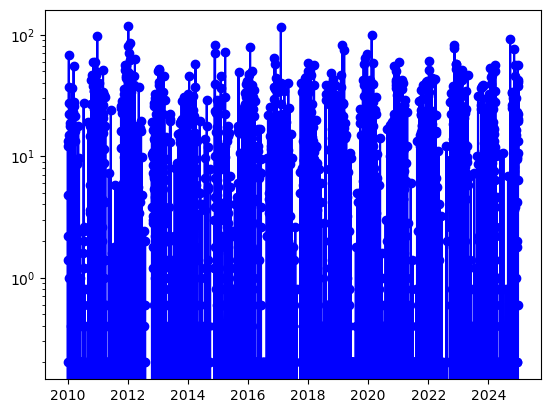

In [17]:
plt.plot(df.index, df["PRECIPITACAO"], marker="o", linestyle="-", color="b", label="PRECIPITACAO") 
plt.yscale('log')  # Set log scale for Y-axis
plt.show()

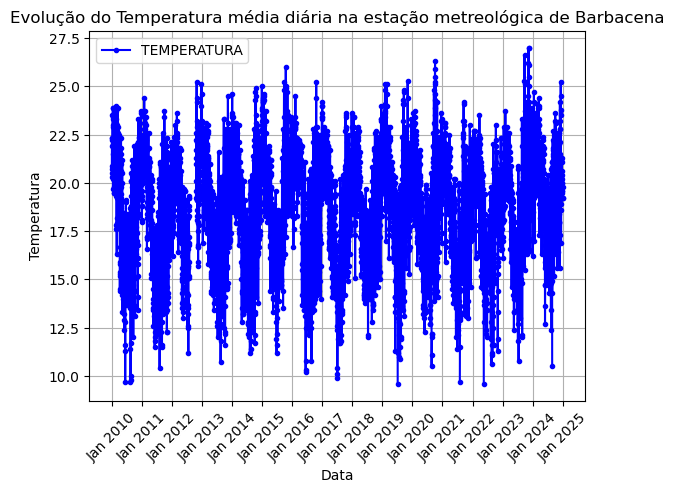

In [53]:
# Criar o gráfico plt.figure(figsize=(12, 6)) 
plt.plot(df.index, df["TEMPERATURA"], marker=".", linestyle="-", color="b", label="TEMPERATURA") 
# Configurar rótulos e título 
plt.xlabel("Data") 
plt.ylabel("Temperatura") 
plt.title("Evolução do Temperatura média diária na estação metreológica de Barbacena") 
plt.xticks(rotation=45) 
# Rotacionar datas para melhor visualização 
plt.legend() 
plt.grid() 

# Configurar rótulos do eixo X para mostrar apenas janeiro 
ax = plt.gca()   # Pega o eixo atual 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))  # Mostra só janeiro 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y")) # Formato "Jan 2022"

# Mostrar o gráfico 
plt.show()

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Convert 'TEMPERATURA' to numeric, creating a new column 'TEMPERATURA_numeric'
df["TEMPERATURA"] = pd.to_numeric(df["TEMPERATURA"], errors="coerce")

# Drop missing values to avoid errors in ACF calculation
df = df.dropna(subset=["TEMPERATURA"])

PRECIPITACAO    float64
TEMPERATURA     float64
dtype: object
DATA
2010-01-01    20.3
2010-01-02    21.9
2010-01-03    22.3
2010-01-04    22.2
2010-01-05    20.9
Name: TEMPERATURA, dtype: float64


<Figure size 1000x500 with 0 Axes>

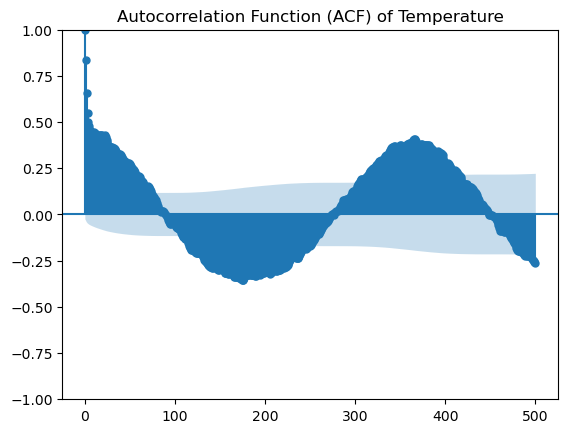

In [69]:
# Plot ACF
plt.figure(figsize=(10,5))
plot_acf(df["TEMPERATURA"], lags=500)  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF) of Temperature")
plt.show()

![alt text](image.png)